In [1]:
# Lab1
# Part 1
# In this part we run a series of simulations to study the growth factor of GEM

In [2]:
# We first need to write a function that does 
# GEM for us with partial pivoting


def GEM(n,mu,sigma):
    m =  np.random.normal(mu,sigma,[n,n]) 
    for i in range(0,n-1):
        if i == 0:
            U = m
            M_tot = np.eye(n)
            P_tot = np.eye(n)
        pivot_row_index = np.argmax(U[i:(n-1) ,i])
        P = np.eye(n)
        P[i,i] = 0;
        P[pivot_row_index+i,pivot_row_index+i] = 0
        P[pivot_row_index+i,i] = 1
        P[i,pivot_row_index+i] = 1
        

        U = np.dot(P,U)
        P_tot = np.dot(P,P_tot)

        M = np.eye(n)
        M[(i+1):n,i] = -U[(i+1):n,i]/U[i,i]
        M_tot = M.dot(P).dot(M_tot)
        U = M.dot(U)
        
        if i == (n-2):
            L = P_tot.dot(np.linalg.inv(M_tot))
        
    return np.abs(np.max(U)/np.max(m))
    


In [3]:
# generate a random matrix of n x n dimensions

import numpy as np


# Let n be the dimension of our square matrix m
n = 5

# Parameters of normal distribution
mu = 0; sigma = 1


# Simulate for the n= 10, 15, 20, 25 ,..., 400, 
# we run 200 simulations for each n

b =[]
for n in range(2,100,5):
    a = []
    for i in range(0,500):
        a.append(GEM(n,mu,sigma))
    b.append(np.median(a))


Text(0, 0.5, 'Growth Factor, g')

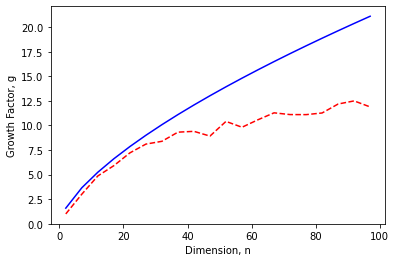

In [4]:
import matplotlib.pyplot as plt

t = np.arange(2, 100, 5)
plt.plot(t,b, 'r--', t,np.power(t,2/3),'b')
plt.xlabel('Dimension, n')
plt.ylabel('Growth Factor, g')

# Blue line the theorized growth factor n^(2/3) from  Lloyd N. Trefethen and Robert S. Schreiber
# In red is the simulated growth factor

In [5]:
# Simulating the growth factor, g, for n=10, 20, 50, 100
# 5000 samples collected
a_10 = []
for i in range(0,5000):
    a_10.append(GEM(10,mu,sigma))

a_20 = []
for i in range(0,5000):
    a_20.append(GEM(20,mu,sigma))

a_50 = []
for i in range(0,5000):
    a_50.append(GEM(50,mu,sigma))

    
a_100 = []
for i in range(0,5000):
    a_100.append(GEM(100,mu,sigma))
    


In [6]:
# Removing Outliers
myRange = [0, 500]
myArrFiltered_10 = [x for x in a_10 if myRange[0] <= x <= myRange[1]]
myArrFiltered_20 = [x for x in a_20 if myRange[0] <= x <= myRange[1]]
myArrFiltered_50 = [x for x in a_50 if myRange[0] <= x <= myRange[1]]
myArrFiltered_100 = [x for x in a_100 if myRange[0] <= x <= myRange[1]]


(array([1.268e+03, 1.252e+03, 5.410e+02, 3.540e+02, 2.710e+02, 1.770e+02,
        1.360e+02, 1.140e+02, 9.800e+01, 6.500e+01, 6.000e+01, 4.700e+01,
        3.800e+01, 3.200e+01, 3.900e+01, 2.800e+01, 1.700e+01, 2.500e+01,
        1.700e+01, 2.400e+01, 1.500e+01, 7.000e+00, 1.100e+01, 1.400e+01,
        2.100e+01, 1.400e+01, 1.200e+01, 1.500e+01, 1.000e+01, 1.100e+01,
        5.000e+00, 7.000e+00, 9.000e+00, 1.000e+01, 8.000e+00, 7.000e+00,
        6.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 3.000e+00,
        5.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 2.000e+0

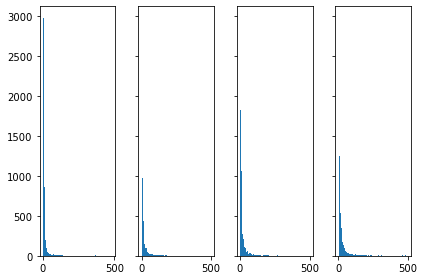

In [7]:
# Histograms for n = 10, 20, 50, 100 respectively

fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True)
axs[0].hist(myArrFiltered_10, bins=100)
axs[1].hist(myArrFiltered_20, bins=100)
axs[2].hist(myArrFiltered_50, bins=100)
axs[3].hist(myArrFiltered_100, bins=100)




In [8]:
#######################################
#######################################

In [9]:
#######################################
#######################################

In [10]:
#######################################
#######################################

In [11]:
# Part 2
# In this part we assess the speed of convergence of different iterative linear solvers

In [12]:
n = 1000
m = np.diag(np.arange(1,n+1,1))
sup_diag = np.arange(0,n-1,1)
sub_diag = np.arange(0,n-1,1)


In [13]:
m[sup_diag,sup_diag+1]=1
m[sub_diag+1,sub_diag]=1

b = np.ones(n)


In [14]:
# In this part we write a function that does steepest descent

def steep_des(m,b, n):
    x = np.zeros(b.size)
    r = b
    r_norm_steep = []
    for i in range(0,n):
        a = r.dot(r)/(r.dot(m).dot(r))
        x = x+a*r
        r = r-a*m.dot(r)
        r_norm_steep.append(r.dot(r))
        if r.dot(r) < 10e-20:
            break
    return x, r_norm_steep, i+1


In [15]:
# Caclculating steepest descent for 100 iterations
x, norm_steep, end_steep = steep_des(m, b, 1000)
end_steep

1000

In [18]:
# In this part we write a function that does Conjugate gradient descent

def conj_des(m,b,n):
    x = np.zeros(b.size)
    r = p = b
    r_norm_conj = []
    actual_res = []
    for i in range(0,n):
        a = r.dot(r)/(p.dot(m).dot(p))
        x = x+a*p
        denom = r.dot(r)
        r = r-a*m.dot(p)
        numer = r.dot(r)
        beta = numer/denom
        p = r+beta*p
        r_norm_conj.append(r.dot(r))
        if numer < 10e-20:
            break
        actual_res.append((b-m.dot(x)).dot(b-m.dot(x)) )
    return x, r_norm_conj, actual_res, i+1



In [19]:
# Caclculating conjugate descent for 100 iterations
x, norm_conj, norm_actual, end_conj = conj_des(m, b, 1000)
end_conj

217

In [20]:
# In this case ||m|| = ||m.inv||
i = np.arange(1,201,1)
K = 2*( ((np.linalg.cond(m)-1)/(np.linalg.cond(m)+1))**i)



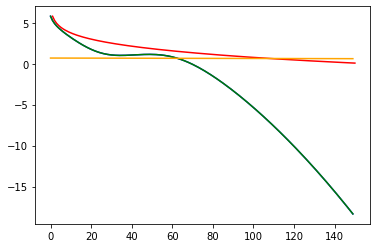

In [24]:
j = 150
plt.plot(np.arange(1,j+1,1),np.log(norm_steep[0:j]),'r',np.log(norm_conj[0:j]),'b', np.log(norm_actual[0:j]), 'g', np.log(K[0:j]), 'orange')



# RED curve gives steepest descent
# BLUE curve gives conjugate descent
# GREEN curve gives actual error
# ORANGE curve gives Kappa condition


In [ ]:
# Comments

# We can see that the using the Conjugate gradient is by fast converging the fastest
# in terms of minimizing the norm of the residual vector r.
#
# In fact, I have programmed both Conjugate and Steepest descent to terminate when the
# norm of r is less than 10e-20. This information can be foung from the variables
# end_steep and end_conj.
#
# We can see that while steepest descent carries out the whole 1000 iterations, i.e.
# the norm never hits the lower bound of 10e-20, for conjugate descent the algorithm
# breaks after about 200 iterations. Showing a much rapid convergenvence